In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import os

In [2]:
cd = "C:\\Users\\ASUS\\Desktop\\data"

In [3]:
os.listdir(cd)

['.Rhistory',
 'A1_.csv',
 'A1_FE.xlsx',
 'A1_imp.csv',
 'A1_RF.csv',
 'A2_.csv',
 'A2_FE.xlsx',
 'A2_imp.csv',
 'A2_RF.csv',
 'AverageBE.csv',
 'AverageBE_real.csv',
 'BE_PERMNO_DATE.csv',
 'BE_PERMNO_DATE_real.csv',
 'BiasAEREAL.png',
 'BiasAFML.png',
 'correlation.csv',
 'CVndepthA1.png',
 'CVndepthA2.png',
 'CVndepthQ1.png',
 'CVndepthQ2.png',
 'CVndepthQ3.png',
 'CVnpercA1.png',
 'CVnpercA2.png',
 'CVnpercQ1.png',
 'CVnpercQ2.png',
 'CVnpercQ3.png',
 'CVnpredA1.png',
 'CVnpredA2.png',
 'CVnpredQ1.png',
 'CVnpredQ2.png',
 'CVnpredQ3.png',
 'CVNTreesA1.png',
 'CVNTreesA2.png',
 'CVNTreesQ1.png',
 'CVNTreesQ2.png',
 'CVNTreesQ3.png',
 'Decay_BE.png',
 'EPS_Decision_Tree.jpg',
 'FeatureImportanceA1.png',
 'FeatureImportanceA2.png',
 'FeatureImportanceQ1.png',
 'FeatureImportanceQ2.png',
 'FeatureImportanceQ3.png',
 'FF.csv',
 'Figure 5.png',
 'Figure 9.png',
 'Figure5.html',
 'Figure_1_2_3_5.R',
 'Figure_4_6_Table1.R',
 'Figure_7.R',
 'Figure_8.R',
 'Figure_9.R',
 'FMret_avg1.xlsx',
 

In [4]:
os.chdir(cd)

In [5]:
def wavg(group):
    d = group[sort_var]
    w = group['Mkt_value']
    return (d * w).sum() / w.sum()

In [6]:
def avg(group):
    d = group[sort_var]
    return d.mean()

# Return Predictability

In [7]:
CRSP = pd.read_csv("C:\\Users\\ASUS\\Desktop\\bias\\all_datasets\\crsp_msf.csv",usecols=['PERMNO', 'date', 'SHRCD', 'EXCHCD', 'RET', 'DLRET', 'SHROUT', 'PRC'], low_memory=False)

In [9]:
CRSP

,PERMNO,PRC,RET,Mkt_value,rankdate
0,10000,4.37500,NaN,1.610000e+04,1986-01
1,10000,3.25000,-0.257143,1.196000e+04,1986-02
2,10000,4.43750,0.365385,1.633000e+04,1986-03
3,10000,4.00000,-0.098592,1.517200e+04,1986-04
4,10000,3.10938,-0.222656,1.179388e+04,1986-05
...,...,...,...,...,...
3763449,93436,275.60999,-0.072489,8.636156e+08,2022-08
3763450,93436,265.25000,-0.037589,8.376595e+08,2022-09
3763451,93436,227.53999,-0.142168,7.185149e+08,2022-10
3763452,93436,194.70000,-0.144326,6.148143e+08,2022-11


In [8]:
CRSP = CRSP[(CRSP.SHRCD.apply(lambda x: x in [10.0, 11.0])) & (CRSP.EXCHCD.apply(lambda x: x in [1, 2, 3]))].reset_index(drop=True)

In [9]:
CRSP.loc[CRSP.DLRET.notnull(), 'RET'] = CRSP.DLRET
CRSP['PRC'] = abs(CRSP['PRC'])
CRSP['Mkt_value'] = CRSP['SHROUT'] * CRSP['PRC']

In [10]:
CRSP['rankdate']=pd.to_datetime(CRSP.date,format='%Y%m%d')
CRSP['rankdate'] = CRSP['rankdate'].dt.to_period('M')
CRSP['RET'] = pd.to_numeric(CRSP['RET'], errors='coerce')

In [11]:
CRSP.drop(['date', 'SHRCD', 'EXCHCD', 'DLRET', 'SHROUT'], axis=1, inplace=True)

In [12]:
#####import data of RF forecast######
A1_RF_forecast= pd.read_csv('A1_RF.csv', low_memory=False)
A2_RF_forecast= pd.read_csv('A2_RF.csv', low_memory=False)
Q1_RF_forecast= pd.read_csv('Q1_RF.csv', low_memory=False)
Q2_RF_forecast= pd.read_csv('Q2_RF.csv', low_memory=False)
Q3_RF_forecast= pd.read_csv('Q3_RF.csv', low_memory=False)

In [13]:
#####import data of Fama-French Factors######
ff = pd.read_csv('FF.csv')
ff['rankdate'] = pd.to_datetime(ff['Date'], format='%Y%m', errors='coerce')
ff['rankdate'] = ff['rankdate'].dt.to_period('M')

In [16]:
A1_RF_forecast

,rankdate,PERMNO,PRC,RET,CFACPR,CFACSHR,TICKER,PENDS,VALUE,past_eps,...,accrual,ptb,PEG_trailing,divyield,PEG_1yrforward,PEG_ltgforward,adj_actual,Linear_Forecast,realized_linear_bias,predict_rf_mean
0,1976-03,12490,262.0000,0.024939,16.698519,16.0,IBM,1976-12-31,15.92,NaN,...,-0.118,3.394,1.30800,2.6700,NaN,NaN,15.92,NaN,NaN,NaN
1,1976-04,12490,253.3750,-0.032920,16.698519,16.0,IBM,1976-12-31,15.92,NaN,...,-0.118,3.282,1.26500,2.7600,NaN,NaN,15.92,NaN,NaN,NaN
2,1976-05,12490,256.6250,0.019734,16.698519,16.0,IBM,1976-12-31,15.92,NaN,...,-0.019,3.268,1.14400,2.7300,NaN,NaN,15.92,NaN,NaN,NaN
3,1976-06,12490,276.7500,0.078422,16.698519,16.0,IBM,1976-12-31,15.92,NaN,...,-0.019,3.524,1.23400,2.5300,NaN,NaN,15.92,NaN,NaN,NaN
4,1976-07,12490,272.1250,-0.016712,16.698519,16.0,IBM,1976-12-31,15.92,NaN,...,-0.019,3.465,1.21300,2.5700,NaN,NaN,15.92,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421071,2022-12,77699,2.7800,NaN,1.000000,1.0,ERC1,2022-10-31,-0.38,-0.3000,...,-0.034,1.656,1.45400,1.8300,NaN,NaN,-0.38,NaN,NaN,NaN
1421072,2022-12,84607,0.9625,NaN,1.000000,1.0,EMKR,2022-09-30,-0.34,0.6700,...,-0.148,0.304,1.45400,1.8300,NaN,NaN,-0.34,NaN,NaN,NaN
1421073,2022-12,89447,29.4000,NaN,1.000000,1.0,CVGW,2022-10-31,0.50,0.3500,...,-0.136,2.345,1.45400,3.7215,NaN,NaN,0.50,NaN,NaN,NaN
1421074,2022-12,92091,1.0500,NaN,1.000000,1.0,BLSI,2022-09-30,0.20,-1.3998,...,0.073,0.537,1.45400,1.8300,NaN,NaN,0.20,NaN,NaN,NaN


In [14]:
#####meger forecast bias with CRSP######
start_date='1986-01'
end_date='2021-12'
for horizon in ('A1_','A2_','Q1_','Q2_','Q3_'):
    Forecast_Output = eval(horizon + 'RF_forecast').reset_index(drop=True)
    Forecast_Output.rename(columns={'MEANEST': 'analyst_forecast'}, inplace=True)
    Forecast_Output = Forecast_Output[(Forecast_Output['rankdate'] >= start_date) & (Forecast_Output['rankdate'] <= end_date)]
    Forecast_Output['rankdate'] = pd.to_datetime(Forecast_Output.rankdate).dt.to_period('M')
    Forecast_Output[horizon + 'dif'] = Forecast_Output['analyst_forecast'] - Forecast_Output['predict_rf_mean']
    Forecast_Output[horizon + 'real_dif'] = Forecast_Output['analyst_forecast'] - Forecast_Output['adj_actual']
    CRSP = pd.merge(left=CRSP, right=Forecast_Output[['PERMNO','rankdate', horizon + 'dif', horizon + 'real_dif']], how='left', on=['PERMNO','rankdate'])
    CRSP[horizon + 'bias'] = CRSP[horizon + 'dif'] / CRSP['PRC']
    CRSP[horizon + 'real_bias'] = CRSP[horizon + 'real_dif'] / CRSP['PRC']
    CRSP.sort_values(by=['PERMNO','rankdate'], ascending=True, inplace=True)
    CRSP[horizon + 'lag_bias'] = CRSP.groupby('PERMNO', group_keys=True)[horizon + 'bias'].shift(1).values


In [111]:
CRSP

,PERMNO,PRC,RET,Mkt_value,rankdate,A1_dif,A1_real_dif,A1_bias,A1_real_bias,A1_lag_bias,...,Q2_dif,Q2_real_dif,Q2_bias,Q2_real_bias,Q2_lag_bias,Q3_dif,Q3_real_dif,Q3_bias,Q3_real_bias,Q3_lag_bias
0,10000,4.37500,NaN,1.610000e+04,1986-01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10000,3.25000,-0.257143,1.196000e+04,1986-02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10000,4.43750,0.365385,1.633000e+04,1986-03,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000,4.00000,-0.098592,1.517200e+04,1986-04,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10000,3.10938,-0.222656,1.179388e+04,1986-05,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3826455,93436,275.60999,-0.072489,8.636156e+08,2022-08,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3826456,93436,265.25000,-0.037589,8.376595e+08,2022-09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3826457,93436,227.53999,-0.142168,7.185149e+08,2022-10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3826458,93436,194.70000,-0.144326,6.148143e+08,2022-11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
merged = CRSP.sort_values(by=['PERMNO', 'rankdate'], ascending=True).drop_duplicates(subset=['PERMNO','rankdate'])

In [113]:
BE_PERMNO_DATE = merged[['PERMNO', 'rankdate', 'Q1_bias', 'Q2_bias', 'Q3_bias', 'A1_bias', 'A2_bias']].rename(columns={'Q1_bias': "BEQ1", 'Q2_bias': 'BEQ2', 'Q3_bias': 'BEQ3', 'A1_bias': 'BEA1s', 'A2_bias': 'BEA2s'})
BE_PERMNO_DATE_real = merged[['PERMNO', 'rankdate', 'Q1_real_bias', 'Q2_real_bias', 'Q3_real_bias', 'A1_real_bias', 'A2_real_bias']].rename(columns={'Q1_real_bias': "BEQ1", 'Q2_real_bias': 'BEQ2', 'Q3_real_bias': 'BEQ3', 'A1_real_bias': 'BEA1s', 'A2_real_bias': 'BEA2s'})

In [114]:
BE_PERMNO_DATE = BE_PERMNO_DATE[(BE_PERMNO_DATE['rankdate'] >= '1986-01') & (BE_PERMNO_DATE['rankdate'] <= '2021-12')].reset_index(drop=True)
BE_PERMNO_DATE_real = BE_PERMNO_DATE_real[(BE_PERMNO_DATE_real['rankdate'] >= '1986-01') & (BE_PERMNO_DATE_real['rankdate'] <= '2021-12')].reset_index(drop=True)

In [115]:
BE_PERMNO_DATE.to_csv('BE_PERMNO_DATE.csv')
BE_PERMNO_DATE_real.to_csv('BE_PERMNO_DATE_real.csv')

In [16]:
merged['count'] = merged[['A1_lag_bias','A2_lag_bias','Q1_lag_bias','Q2_lag_bias','Q3_lag_bias']].apply(lambda x: x.count(), axis=1)
# axis=1， 对每一行计算非NA值的个数

In [17]:
merged = merged.loc[(merged['count'] >= 2) & (merged['rankdate'] >= '1986-01') & (merged['rankdate'] <= '2021-12')].reset_index(drop=True)

In [18]:
######caculate BE score and average BE#########
merged['avg_bias'] = (merged['A1_lag_bias'].fillna(0) + merged['A2_lag_bias'].fillna(0) + merged['Q1_lag_bias'].fillna(0) + merged['Q2_lag_bias'].fillna(0) + merged['Q3_lag_bias'].fillna(0)) / merged['count']

In [19]:
merged.sort_values(by=['rankdate'], inplace=True)
for horizon in ('A1_','A2_','Q1_','Q2_','Q3_'):
    merged[horizon + 'rank'] = 1 + merged.groupby('rankdate', group_keys=True)[horizon + 'lag_bias'].apply(lambda x: pd.qcut(x, 100, labels=False)).values
    # 100分位

In [20]:
merged['bias_score'] = (merged['A1_rank'].fillna(0) + merged['A2_rank'].fillna(0) + merged['Q1_rank'].fillna(0) + merged['Q2_rank'].fillna(0) + merged['Q3_rank'].fillna(0)) / merged['count']

## FM regression

In [29]:
var='bias_score'    ###using either avg_bias or bias_score, changing the output excel name accordingly;
###Output excel files, 1 without control and 2 with control variables.
FM='FMret_score1.xlsx'   ### FMret_avg.xlsx or FMret_score.xlsx

In [30]:
predictor=[var]####add control predictor,'lnsize', 'lnbeme', 'ret1','ret12_7','turnover','retvol','ivol','IA'
# 暂时还没有控制变量的数据
FM_return = merged.dropna(subset=['RET'])
Intercept = pd.DataFrame(columns=['intercept'])
date = pd.DataFrame(columns=['date'])
Coefficients = pd.DataFrame(columns = predictor)
rankdate = FM_return.sort_values(by='rankdate')['rankdate'].unique()
r_sqr = pd.DataFrame(columns=['r_sqr'])
# OLS.score(data[predictor], data['RET']: Return the coefficient of determination of the prediction
for i in rankdate:
    data = FM_return[FM_return['rankdate'] == i]
    OLS = LinearRegression().fit(data[predictor],data['RET'])
    Intercept.loc[len(Intercept)] = OLS.intercept_
    Coefficients.loc[len(Coefficients)] = OLS.coef_.flatten()
    date.loc[len(date)] = i
    r_sqr.loc[len(r_sqr)] = 1 - (1 - OLS.score(data[predictor], data['RET'])) * (len(data['RET']) - 1) / (len(data['RET']) - data[predictor].shape[1] - 1)
    result = pd.concat([date, Intercept, Coefficients, r_sqr],axis=1)

In [31]:
result.to_excel(FM)

# Portfolio Sorts

In [21]:
merged['rank_avg_bias'] = 1 + merged.groupby('rankdate', group_keys=True)['avg_bias'].apply(lambda x: pd.qcut(x, 5, labels=False)).values
merged['rank_bias_score'] = 1 + merged.groupby('rankdate', group_keys=True)['bias_score'].apply(lambda x: pd.qcut(x, 5, labels=False)).values

In [23]:
merged

,PERMNO,PRC,RET,Mkt_value,rankdate,A1_dif,A1_real_dif,A1_bias,A1_real_bias,A1_lag_bias,...,count,avg_bias,A1_rank,A2_rank,Q1_rank,Q2_rank,Q3_rank,bias_score,rank_avg_bias,rank_bias_score
484491,60011,29.25000,0.231579,9.041175e+04,1986-02,NaN,NaN,NaN,NaN,0.010882,...,2,-0.029367,44.0,NaN,25.0,NaN,NaN,34.500000,1,2
436028,52821,52.25000,0.215116,5.374958e+05,1986-02,0.702380,2.2200,0.013443,0.042488,0.011399,...,3,-0.011315,47.0,58.0,11.0,NaN,NaN,38.666667,1,2
50473,11260,56.75000,0.230352,6.370812e+06,1986-02,1.171731,2.0835,0.020647,0.036714,0.027533,...,3,-0.013623,75.0,72.0,1.0,NaN,NaN,49.333333,1,3
252634,23499,26.75000,0.041363,1.400470e+06,1986-02,0.672402,0.1300,0.025137,0.004860,0.008907,...,3,-0.009681,31.0,61.0,14.0,NaN,NaN,35.333333,2,2
199007,17830,53.25000,0.143467,6.544159e+06,1986-02,0.770198,2.1700,0.014464,0.040751,0.007040,...,3,-0.013548,18.0,27.0,27.0,NaN,NaN,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590159,75342,122.06000,0.081517,4.554181e+06,2021-12,-1.649368,-0.0600,-0.013513,-0.000492,-0.016888,...,2,-0.054706,9.0,NaN,6.0,NaN,NaN,7.500000,1,1
102788,12781,65.22000,0.101170,3.374613e+06,2021-12,-0.264420,0.0700,-0.004054,0.001073,-0.009335,...,3,-0.011624,22.0,9.0,60.0,NaN,NaN,30.333333,3,2
207832,18413,2.36000,-0.250794,8.686924e+04,2021-12,0.139076,-0.1000,0.058931,-0.042373,0.034535,...,2,0.131283,92.0,NaN,88.0,NaN,NaN,90.000000,5,5
102453,12758,31.94000,-0.062518,1.000936e+06,2021-12,0.013746,0.1500,0.000430,0.004696,0.001300,...,2,-0.000608,72.0,NaN,62.0,NaN,NaN,67.000000,4,4


In [22]:
var = 'rank_bias_score'  ###using either rank_avg_bias or rank_bias_score, changing the output excel name accordingly;
sort_var = 'RET'
# quint_return = merged.groupby(['rankdate', var]).apply(wavg)  ## Value-weighted Portfolio Returns
quint_return = merged.groupby(['rankdate', var]).apply(avg)  ## Equal-weighted Portfolio Returns
quint_return = quint_return.to_frame().reset_index()
quint_return = quint_return.rename(columns={0:'ret'})
quint_return[var] = quint_return[var].astype(int)


In [48]:
quint_return

,rankdate,rank_bias_score,ret
0,1986-02,1,0.081716
1,1986-02,2,0.089769
2,1986-02,3,0.074402
3,1986-02,4,0.062838
4,1986-02,5,0.052674
...,...,...,...
2150,2021-12,1,0.045770
2151,2021-12,2,0.061360
2152,2021-12,3,0.025245
2153,2021-12,4,-0.023471


In [23]:
quint_return = quint_return.pivot(index='rankdate', columns=var, values='ret')
quint_return['LS'] = quint_return[5] - quint_return[1]
quint_return['cons'] = 0
from scipy.stats import ttest_ind
# t-test
ttest_ind(quint_return['LS'], quint_return['cons'], equal_var=False)

Ttest_indResult(statistic=-3.5095923277384893, pvalue=0.0004961592972009166)

In [25]:
FF = pd.merge(left=quint_return, right=ff,  how='left',  on=['rankdate']) ##Merge with FF factors
FF.to_csv('ret_port_score_equal.csv', index=False)   ###using either ret_port_score.csv or ret_avg_bias.csv

AttributeError: 'DataFrame' object has no attribute 'to_xlsx'

# Correlation

In [40]:
# Feature_names=['avg_bias','bias_score','Q1_lag_bias','Q2_lag_bias','Q3_lag_bias',
#                'A1_lag_bias','A2_lag_bias','lnsize','lnbeme','ret12_7','ret1','IA','ivol', 'retvol','turnover']
Feature_names=['avg_bias','bias_score','Q1_lag_bias','Q2_lag_bias','Q3_lag_bias', 'A1_lag_bias','A2_lag_bias']

In [41]:
merged

,PERMNO,PRC,RET,Mkt_value,rankdate,A1_dif,A1_bias,A1_lag_bias,A2_dif,A2_bias,...,count,avg_bias,A1_rank,A2_rank,Q1_rank,Q2_rank,Q3_rank,bias_score,rank_avg_bias,rank_bias_score
484491,60011,29.25000,0.231579,9.041175e+04,1986-02,NaN,NaN,0.010882,NaN,NaN,...,2,-0.029367,44.0,NaN,25.0,NaN,NaN,34.500000,1,2
436028,52821,52.25000,0.215116,5.374958e+05,1986-02,0.702380,0.013443,0.011399,NaN,NaN,...,3,-0.011315,47.0,58.0,11.0,NaN,NaN,38.666667,1,2
50473,11260,56.75000,0.230352,6.370812e+06,1986-02,1.171731,0.020647,0.027533,4.104611,0.072328,...,3,-0.013623,75.0,72.0,1.0,NaN,NaN,49.333333,1,3
252634,23499,26.75000,0.041363,1.400470e+06,1986-02,0.672402,0.025137,0.008907,3.431599,0.128284,...,3,-0.009681,31.0,61.0,14.0,NaN,NaN,35.333333,2,2
199007,17830,53.25000,0.143467,6.544159e+06,1986-02,0.770198,0.014464,0.007040,2.982579,0.056011,...,3,-0.013548,18.0,27.0,27.0,NaN,NaN,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590159,75342,122.06000,0.081517,4.554181e+06,2021-12,-1.649368,-0.013513,-0.016888,NaN,NaN,...,2,-0.054706,9.0,NaN,6.0,NaN,NaN,7.500000,1,1
102788,12781,65.22000,0.101170,3.374613e+06,2021-12,-0.264420,-0.004054,-0.009335,NaN,NaN,...,3,-0.011624,22.0,9.0,60.0,NaN,NaN,30.333333,3,2
207832,18413,2.36000,-0.250794,8.686924e+04,2021-12,0.139076,0.058931,0.034535,NaN,NaN,...,2,0.131283,92.0,NaN,88.0,NaN,NaN,90.000000,5,5
102453,12758,31.94000,-0.062518,1.000936e+06,2021-12,0.013746,0.000430,0.001300,NaN,NaN,...,2,-0.000608,72.0,NaN,62.0,NaN,NaN,67.000000,4,4


In [42]:
correlation = merged.groupby(['rankdate'])[Feature_names].corr(method='pearson')

In [43]:
correlation

avg_bias  bias_score  Q1_lag_bias  Q2_lag_bias  \
rankdate                                                               
1986-02  avg_bias     1.000000    0.258025     0.996786     0.998908   
         bias_score   0.258025    1.000000     0.252206     0.317796   
         Q1_lag_bias  0.996786    0.252206     1.000000    -1.000000   
         Q2_lag_bias  0.998908    0.317796    -1.000000     1.000000   
         Q3_lag_bias  0.971582    0.689512     0.921879          NaN   
...                        ...         ...          ...          ...   
2021-12  Q1_lag_bias  0.944912    0.586138     1.000000          NaN   
         Q2_lag_bias  0.990019    0.458440          NaN     1.000000   
         Q3_lag_bias  0.986807    0.557640          NaN          NaN   
         A1_lag_bias  0.873316    0.334995     0.651904     0.922401   
         A2_lag_bias  0.983038    0.491272     0.928683          NaN   

                      Q3_lag_bias  A1_lag_bias  A2_lag_bias  
rankdate                                                     
1986-02  avg_bias        0.971582     0.995043     0.960720  
         bias_score      0.689512     0.238353     0.484845  
         Q1_lag_bias     0.921879     0.993486     0.917559  
         Q2_lag_bias          NaN     0.996768     0.866641  
         Q3_lag_bias     1.000000     0.941722     0.846741  
...                           ...          ...          ...  
2021-12  Q1_lag_bias          NaN     0.651904     0.928683  
         Q2_lag_bias          NaN     0.922401          NaN  
         Q3_lag_bias     1.000000     0.853233          NaN  
         A1_lag_bias     0.853233     1.000000     0.836184  
         A2_lag_bias          NaN     0.836184     1.000000  

[3017 rows x 7 columns]

In [44]:
corr=correlation.reset_index().groupby(['level_1'])[Feature_names].mean()

In [45]:
se = correlation.reset_index().groupby(['level_1'])[Feature_names].sem()

In [26]:
se

,avg_bias,bias_score,Q1_lag_bias,Q2_lag_bias,Q3_lag_bias,A1_lag_bias,A2_lag_bias
level_1,,,,,,,
A1_lag_bias,0.004482,0.004776,0.010211,0.008903,0.006918,0.000000,0.009562
A2_lag_bias,0.007175,0.005628,0.009820,0.010522,0.012136,0.009562,0.000000
Q1_lag_bias,0.005012,0.005047,0.000000,0.067508,0.069149,0.010211,0.009820
Q2_lag_bias,0.002364,0.005726,0.067508,0.000000,0.051225,0.008903,0.010522
Q3_lag_bias,0.003456,0.005764,0.069149,0.051225,0.000000,0.006918,0.012136
avg_bias,0.000000,0.005607,0.005012,0.002364,0.003456,0.004482,0.007175
bias_score,0.005607,0.000000,0.005047,0.005726,0.005764,0.004776,0.005628


In [31]:
corr

,avg_bias,bias_score,Q1_lag_bias,Q2_lag_bias,Q3_lag_bias,A1_lag_bias,A2_lag_bias
level_1,,,,,,,
A1_lag_bias,0.893562,0.347543,0.745967,0.775544,0.812914,1.000000,0.724002
A2_lag_bias,0.866315,0.448658,0.636172,0.614677,0.599218,0.724002,1.000000
Q1_lag_bias,0.932375,0.484072,1.000000,0.760131,0.704425,0.745967,0.636172
Q2_lag_bias,0.936747,0.528530,0.760131,1.000000,0.872303,0.775544,0.614677
Q3_lag_bias,0.935474,0.538003,0.704425,0.872303,1.000000,0.812914,0.599218
avg_bias,1.000000,0.430877,0.932375,0.936747,0.935474,0.893562,0.866315
bias_score,0.430877,1.000000,0.484072,0.528530,0.538003,0.347543,0.448658


In [46]:
df=corr.reindex(['avg_bias','bias_score','Q1_lag_bias','Q2_lag_bias','Q3_lag_bias', 'A1_lag_bias','A2_lag_bias'])

In [47]:
df.index.name = 'Variable'

In [48]:
ut=np.triu(np.ones(df.shape), 0).astype(bool)
# lt=np.tril(np.ones(df.shape),0).astype(bool)
df1=df.mask(ut)
# df1.set_index(['level_1'], drop=True, inplace=True)

In [49]:
df

,avg_bias,bias_score,Q1_lag_bias,Q2_lag_bias,Q3_lag_bias,A1_lag_bias,A2_lag_bias
Variable,,,,,,,
avg_bias,1.000000,0.432195,0.934054,0.938582,0.936996,0.894541,0.866375
bias_score,0.432195,1.000000,0.484072,0.529237,0.541850,0.348114,0.451957
Q1_lag_bias,0.934054,0.484072,1.000000,0.784875,0.722304,0.749856,0.638234
Q2_lag_bias,0.938582,0.529237,0.784875,1.000000,0.800605,0.782240,0.620798
Q3_lag_bias,0.936996,0.541850,0.722304,0.800605,1.000000,0.817277,0.607224
A1_lag_bias,0.894541,0.348114,0.749856,0.782240,0.817277,1.000000,0.724655
A2_lag_bias,0.866375,0.451957,0.638234,0.620798,0.607224,0.724655,1.000000


In [50]:
def pd_fill_diagonal(df_matrix, value = 0):
    mat = df_matrix.values
    n = mat.shape[0]
    mat[range(n), range(n)] = value
    return pd.DataFrame(mat)

In [51]:
df2 = pd_fill_diagonal(df1, value = 1)
df2 = df2.round(3)

In [52]:
df2

,0,1,2,3,4,5,6
0,1.000,NaN,NaN,NaN,NaN,NaN,NaN
1,0.432,1.000,NaN,NaN,NaN,NaN,NaN
2,0.934,0.484,1.000,NaN,NaN,NaN,NaN
3,0.939,0.529,0.785,1.000,NaN,NaN,NaN
4,0.937,0.542,0.722,0.801,1.000,NaN,NaN
5,0.895,0.348,0.750,0.782,0.817,1.000,NaN
6,0.866,0.452,0.638,0.621,0.607,0.725,1.0


In [53]:
df2.columns = ['Average BE','BE Score','BE_Q1','BE_Q2','BE_Q3','BE_A1','BE_A2']
df2=df2.set_index([pd.Index(['Average BE','BE Score','BE_Q1','BE_Q2','BE_Q3','BE_A1','BE_A2'])])

In [54]:
df2.index.name = 'Variable'

In [55]:
df2

,Average BE,BE Score,BE_Q1,BE_Q2,BE_Q3,BE_A1,BE_A2
Variable,,,,,,,
Average BE,1.000,NaN,NaN,NaN,NaN,NaN,NaN
BE Score,0.432,1.000,NaN,NaN,NaN,NaN,NaN
BE_Q1,0.934,0.484,1.000,NaN,NaN,NaN,NaN
BE_Q2,0.939,0.529,0.785,1.000,NaN,NaN,NaN
BE_Q3,0.937,0.542,0.722,0.801,1.000,NaN,NaN
BE_A1,0.895,0.348,0.750,0.782,0.817,1.000,NaN
BE_A2,0.866,0.452,0.638,0.621,0.607,0.725,1.0


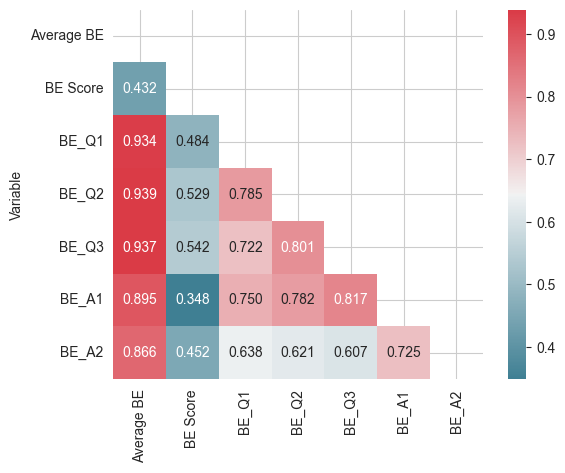

In [56]:
#cmap是设置热图的颜色
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#绘制热图
g = sns.heatmap(df2, mask=ut, cmap=cmap, square=True, annot=True, fmt='0.3f')
#  xcorr : 数据矩阵
#  mask : 为True的元素对应位置不会画出来（mask面具的意义）
#  cmap: 颜色设置
#  square: （True）代表行列长度一致，且绘制的每个也是方格
#  annot ： 在格内显示数据
#  fmt ：数据格式

In [57]:
df2=df2.replace(np.NaN,'')

In [58]:
df2.to_csv('correlation.csv')   ### Correlations

In [59]:
corr=corr.reindex(['avg_bias','bias_score','Q1_lag_bias','Q2_lag_bias','Q3_lag_bias', 'A1_lag_bias','A2_lag_bias'])
se=se.reindex(['avg_bias','bias_score','Q1_lag_bias','Q2_lag_bias','Q3_lag_bias','A1_lag_bias','A2_lag_bias'])

In [60]:
significance =corr.div(se) ### Significance of correlations

In [61]:
significance

,avg_bias,bias_score,Q1_lag_bias,Q2_lag_bias,Q3_lag_bias,A1_lag_bias,A2_lag_bias
level_1,,,,,,,
avg_bias,inf,76.759486,197.229760,404.424299,292.826065,197.374826,122.244941
bias_score,76.759486,inf,96.393817,92.318118,94.708254,72.243924,79.953748
Q1_lag_bias,197.229760,96.393817,inf,12.287546,10.820564,74.329623,65.173134
Q2_lag_bias,404.424299,92.318118,12.287546,inf,12.016456,89.453833,60.395214
Q3_lag_bias,292.826065,94.708254,10.820564,12.016456,inf,123.011431,51.191509
A1_lag_bias,197.374826,72.243924,74.329623,89.453833,123.011431,inf,76.390606
A2_lag_bias,122.244941,79.953748,65.173134,60.395214,51.191509,76.390606,inf
